In [1]:
%load_ext autoreload
%autoreload complete

In [2]:
import numpy as np
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import data_accessor as acc
datas = [
    'temperature_230509_discrete',
    'pressure_230516_discrete'
    ]
data_dictionary = acc.setup(datas)

loading temperature_230509_discrete__________________________
	input shape (number, dimension): (6000, 10000)
	label shape (number, dimension): (6000, 1)
	there are 16 folds
	4200 for training, 600 for validating, 1200 for testing
loading pressure_230516_discrete__________________________
	input shape (number, dimension): (5000, 10000)
	label shape (number, dimension): (5000, 1)
	there are 16 folds
	3500 for training, 500 for validating, 1000 for testing


__________CROSS VALIDATION__________
Cross-validation rounds: 16
Epochs: 1000
Datas to learn: 
	0: temperature_230509_discrete
	1: pressure_230516_discrete
SINGLE TASK____________________________
we're learning: temperature_230509_discrete
>round 0
EARLY STOPPING @ epoch 16
min train loss: 0.00017253706689437175
min valid loss: 0.00014521076664095745


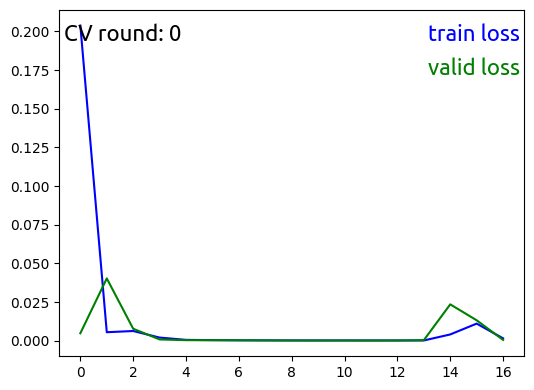

>round 1
EARLY STOPPING @ epoch 19
min train loss: 0.00014040170533531415
min valid loss: 0.00011572292933124118


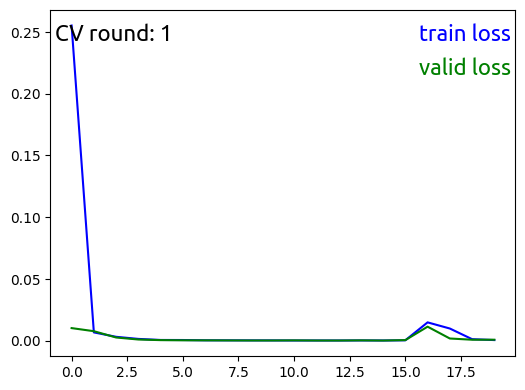

>round 2
EARLY STOPPING @ epoch 22
min train loss: 0.00012238299280976537
min valid loss: 0.00019989704451290892


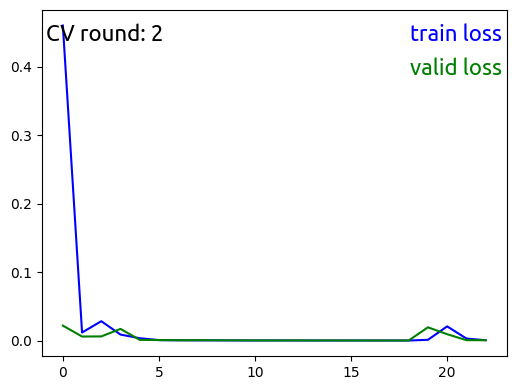

>round 3
EARLY STOPPING @ epoch 16
min train loss: 0.00015975813574076517
min valid loss: 0.00022642196854576467


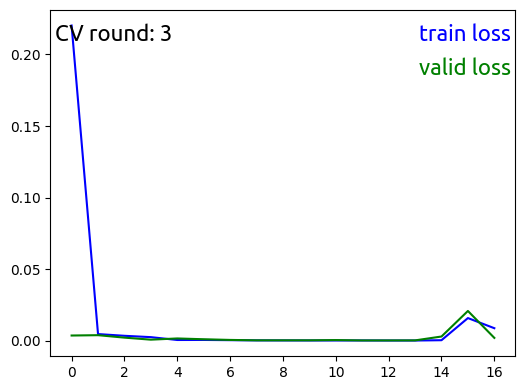

>round 4
EARLY STOPPING @ epoch 18
min train loss: 0.00013755236845595803
min valid loss: 9.961292162188328e-05


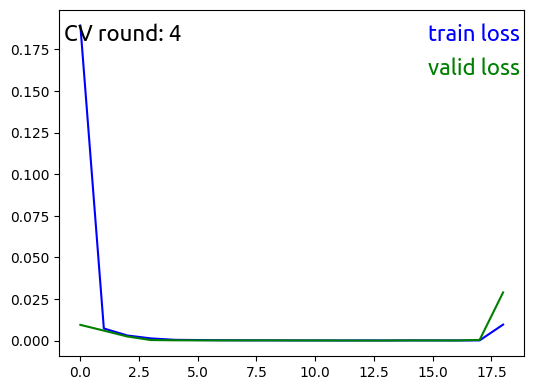

>round 5


In [12]:
from CrossValidation import CrossValidator
from tools import SaveBestCrossValidationModel
from Triplet_TCN import TripletAux_and_TCNDataset, TripletAux_and_TCNManager
from data import alternate_rows_itertools
s = {
    'problem'           : "regression",
    'approach'          : "metric learning/non-parametric",
    'algorithm'         : "triplet network",
    'input'             : "samples from a distribution",
    'input type'        : "vectors",
    'input meaning'     : "spectrum", 
    'input dimension'   : 10000,
    'input channels'    : 1,
    'output'            : "samples from a distribution",
    'output type'       : "one number",
    'output meaning'    : "temperature or pressure, depending on distribution",
    'output dimension'  : 1,
    'learning rate'     : 5e-4, # was 1e-4
    'feature dimension' : 300,
    'cross validation round': 16,
    'cross validation round-development' : 2,
    'epoch'             : 1000,
    'epoch-development' : 20,
    'batch size'        : 64,
    'number of convolution levels': 3,
    'best model folder' : 'triplet_best_model/'
}
# datas.reverse()
CVtor = CrossValidator(saver=SaveBestCrossValidationModel(s['best model folder']), 
                       dataset=TripletAux_and_TCNDataset,
                       datas=datas,
                       data_dictionary=data_dictionary,
                       manager=TripletAux_and_TCNManager,
                       settings=s,
                       device=device,
                       dev=False)
CVtor.single_task_train(0)
# CVtor.multi_task_train_sequential()
# CVtor.multi_task_train_weave(alternate_rows_itertools) 
CVtor.complete_notify()
CVtor.test_all()